In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import misc

import time

Let's do some setup and  load in image 

/home/ulvik/git/in5400/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


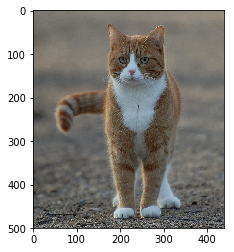

Image size: (500, 439, 3)


In [5]:
img = misc.imread('cat.png').astype(np.float)/255
#plt.figure()
plt.imshow(img)
plt.show()
start = time.time()
#out1 = sobel_filter(img)
#out2 = blur_filter(img)
#print('Calculation time:', time.time()-start, 'sec')
print('Image size:',img.shape)

Now, implement convolution of image of NxM pixels and C spectral bands (C=3 for a RGB image) 
with a filter kernel of size Nk x Mk. THis image has 500*439pixels and 3 band since it is a colour image. 

To compute the result of pixel (i,j,c), place the filter kernel at pixel (i,j,c) and multiply the image and the filter at all locations where the filter overlaps the image, then sum the result. 
This sum can be computed using np.sum, or you can use 2 for-loops (this will be slower).

To compute the result of all pixels we need a for loop over all the indexes, in this case three for loops over image width (N), height (M) and number of channels (C). 

In this example we compute convolution only at those pixels where the filter kernel fits inside the image. 

First, implement convolution_loops where you in addition to the 3 outer loops also loop over the filter kernel.  See lecture notes for formula. 


In [3]:
def convolution_loops(image, kernel):
    """
    Write a general function to convolve an image with an arbitrary kernel.
    """
    out = np.zeros(image.shape)
    
    for c_image in range(image.shape[2]):
        for i_image in range(image.shape[0]):
            for j_image in range(image.shape[1]):
                pixel_sum = 0

                for i_kernel in range(kernel.shape[0]):
                    for j_kernel in range(kernel.shape[1]):
                        


    return out

Now, replace the loop over the filter kernel by using either np.sum or np.dot (the latter after reshaping the current subwindow and the filter into a 1D vectors of length (1,Nk*Mk) 

In [4]:
def convolution(image, kernel):
  """
  Write a general function to convolve an image with an arbitrary kernel.
  """
  out = np.zeros(image.shape)
   ## Your code here 
  return out

Calculation time loops: 0.0006923675537109375 sec
Calculation time without inner lopps: 0.0003943443298339844 sec


/opt/ifi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/opt/ifi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


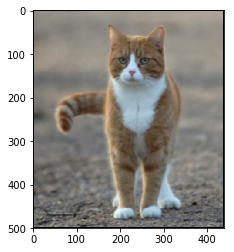

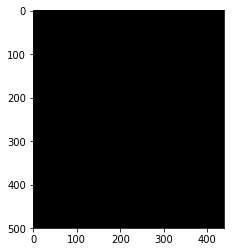

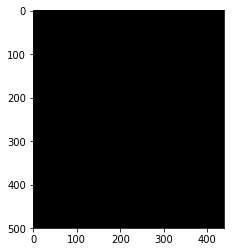

In [5]:
# CHeck that your image looks correct with a given artbitraty filter
img = plt.imread('cat.png')

kernel = np.arange(25).reshape((5, 5))

start= time.time()
out1 = convolution_loops(img, kernel)

#out1 = sobel_filter(img)
#out2 = blur_filter(img)
print('Calculation time loops:', time.time()-start, 'sec')

start= time.time()
out2 = convolution(img, kernel)

#out1 = sobel_filter(img)
#out2 = blur_filter(img)
print('Calculation time without inner lopps:', time.time()-start, 'sec')


out1 -= out1.min()
out1 /= out1.max()
out2 -= out2.min()
out2 /= out2.max()



correct = plt.imread('convolution_cat.png')[:, :, :3]
plt.figure()
plt.imshow(correct, vmin=correct.min(), vmax=correct.max(), cmap='gray')
plt.figure()
plt.imshow(out1, vmin=out1.min(), vmax=out1.max())
plt.show()
plt.figure()
plt.imshow(out2, vmin=out2.min(), vmax=out2.max())
plt.show()


In [6]:
def blur_filter(img):
  """
  Use your convolution function to filter your image with an average filter (box filter)
  with kernel size of 11. The filter should have coefficients 1/(k_size*k_size)
  """
  k_size = 11
  kernel = np.ones((k_size, k_size))/k_size**2
  return convolution(img, kernel)


In [8]:
# Check your blurred image 
img = plt.imread('cat.png').astype(np.float) / 255
out = blur_filter(img)
out -= out.min()
out /= out.max()

correct = plt.imread('blur_cat.png')[:, :, :3]
plt.figure()
plt.imshow(correct, vmin=correct.min(), vmax=correct.max(), cmap='gray')
plt.figure()
plt.imshow(out, vmin=out.min(), vmax=out.max())
plt.show()

NameError: name 'blur_filter' is not defined

In [11]:
def sobel_filter(img):
  """
  Use your convolution function to filter your image with a vertical sobel kernel to find vertical edges
  """
  sobel_y = [[1, 2, 1],
            [0, 0, 0],
            [-1, -2, -1]]
  sobel_x = [[1, 0, -1 ],
            [2, 0, -2],
            [1, 0, -1]]
  sobel_y = np.array(sobel_y)
  sobel_x = np.array(sobel_x)
  # Your code here
  out = np.zeros(img.shape)
  
    
    
    
  return out





/opt/ifi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


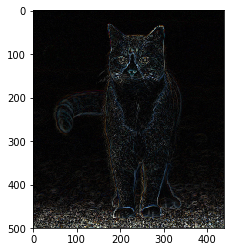

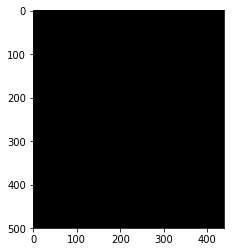

In [12]:
# Check the sobel image 
out = sobel_filter(img)
out -= out.min()
out /= out.max()
correct = plt.imread('sobel_cat.png')[:, :, :3]
plt.figure()
plt.imshow(correct, vmin=correct.min(), vmax=correct.max(), cmap='gray')
plt.figure()
plt.imshow(out, vmin=out.min(), vmax=out.max())
plt.show()